In [8]:
import pandas as pd
data = pd.read_csv('iris.csv',index_col=0)
data.head()

,sepal.width,petal.length,petal.width,variety
sepal.length,,,,
5.1,3.5,1.4,0.2,Setosa
4.9,3.0,1.4,0.2,Setosa
4.7,3.2,1.3,0.2,Setosa
4.6,3.1,1.5,0.2,Setosa
5.0,3.6,1.4,0.2,Setosa


In [9]:
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

machine learning model
1.Svc support vector classification
2.k-neighbour classification 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X = data.drop('variety',axis=1)
y=data['variety']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)



1.0

In [11]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svc,X_test,y_test)
perm_importance.importances_mean


array([0.  , 0.56, 0.2 ])

<AxesSubplot:>

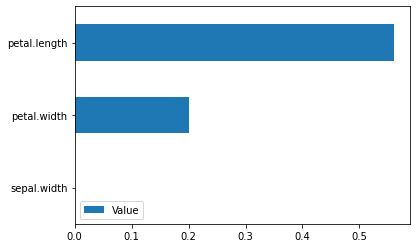

In [12]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx],X_test.columns[sorted_idx],columns=['Value'])
df.plot.barh()

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

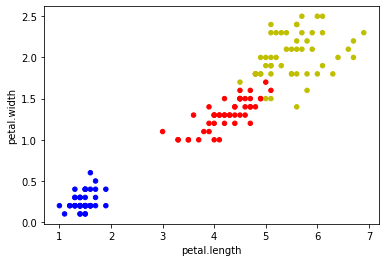

In [16]:
 
color_map = {'Setosa' : 'b','Versicolor':'r','Virginica':'y'}
colors = data['variety'].apply(lambda x:color_map[x])
data.plot.scatter(x='petal.length',y='petal.width',c=colors)

# k neighbour classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [19]:
perm_importance = permutation_importance(kn,X_test,y_test)
perm_importance.importances_mean

array([0.03333333, 0.6       , 0.16      ])